## Binary and n-class classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import random
import time
sys.path.append('../data')


from mylib import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## Logistic Regression
<br>
<font style='font-size:20px; line-height:26px;'>

In a ordinary linear regression:
$$
y=\beta_0 + \beta_1 \cdot x_1+ \beta_2 \cdot x_2+ \cdot \cdot \cdot + \beta_l\cdot x_l +\epsilon = x^\top \beta +\epsilon
$$

where $y \in R$ and the $x\beta$ can also take any value in $R$.

Logistic regression and probit regression model the relationship between one or more numerical or categorical predictor variables and a categorical outcome. That is, the outcome is binary, or must be coded as 0 or 1.   $y \in \{0,1\}$


### logistic model and probit model
Both logistic model and probit model ues function to link the $R$ with $\{0,1\}$. 

<b>Logistic</b> (also known as <b>logit</b>) function uses

$$ 
ln(\frac {p}{1-p})=x \beta
$$

and the <b>probit</b> model uses

$$
\phi^{-1}(p)=x \beta
$$

where $\phi^{-1}$ is the inverse normal function.

The difference in the overall results of the model are usually slight to non-existent, so on a practical level it doesn’t usually matter which one you use.

In logistic model, the $p$ can be solved:

$$ p= \frac {1}{1+e^{-x\beta}} $$

this function form is called sigmoid function
</font>

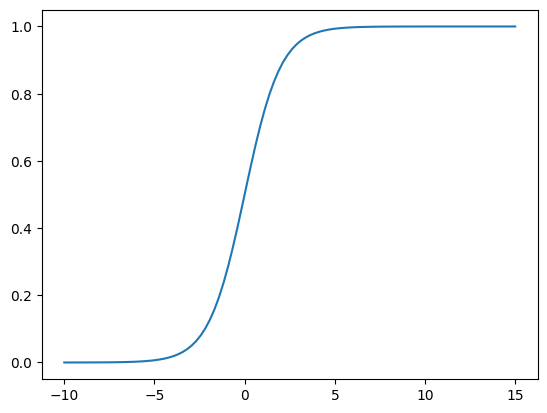

In [3]:
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

fig, ax1 = plt.subplots()
x = np.linspace(-10, 15, 100)
yl = 1/(1+np.exp(-x))
ax1.plot(x,yl,label='Y=X')

### Maximum likelihood estimator

<font style='font-size:20px; line-height:26px;'>

For given $\beta$ , logistic model says that each $y_i$ 
$$ p(y_i|x_i\beta)=\left\{\begin{array}{rcl} 1-f(x_i\beta) & \mbox{for}& y_i=0 \\ f(x_i\beta) & \mbox{for} & y_i=1 \end{array} \right. $$

This can be written in the form of:

$$p(y_i|x_i\beta)=f(x_i\beta)^{y_i}(1-f(x_i\beta))^{1-y_i} $$

with a monotonic function log, the log of likelihood is simplely

$$ ln  P(y_i|x_i\beta)=y_iln f(x_i\beta)+(1-y_i)ln(1-f(x_i\beta))$$

If we assume different data points are independent from one another, the overall likelihood
is just the product of the individual likelihoods. Which means the overall log likelihood is
the sum of the individual log likelihoods.

$$ J(\beta) =\sum_{i=1}^n ln P(y_i|x_i\beta)=\sum_{i=1}^n y_iln f(x_i\beta)+(1-y_i)ln(1-f(x_i\beta))$$

Since the gradient decent is for finding the minimums, we actually need to find the minimum of negative log likelihood.
</font>

In [5]:
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

def _logistic_log_likelihood_i(x_i, y_i, beta):
    return -y_i*math.log(logistic(x_i.dot(beta)))-(1-y_i)*math.log(1 - logistic(x_i.dot(beta)))
    
def _logistic_log_likelihood(x, y, beta):
    return np.mean([_logistic_log_likelihood_i(x_i, y_i, beta) for x_i, y_i in zip(x, y)])


### Getting the gradient 
<br>

<font style='font-size:18px; line-height:26px;'>
In sigmoid function 
    $$ \sigma(x)= \frac {1}{1+e^{-x}} $$
we have 

$$ \frac{\partial \sigma(x)}{\partial x}= \frac{e^{-x}}{(1+e^{-x})^2} =\frac{1}{1+e^{-x}}\left(1-\frac {1}{1+e^{-x}}\right)=\sigma(1-\sigma) $$
  
In Logit model, for each i

$$ P(y_i|x_i)=\sigma(x_i\beta) $$

$$ \frac{\partial P(y_i|x_i)}{\partial x_i}=\sigma(x_i\beta)(1-\sigma(x_i\beta))\beta$$

$$ \frac {\partial J(\beta)}{\partial \beta_j}  =\frac1n \sum_{i=1}^n \frac {1}{P(y_i|x_i\beta)}\frac {\partial P(y_i|x_i\beta)}{\partial f(x_i\beta)}\frac {\partial f(x_i\beta)}{\partial \beta_j} $$


since $f(x_i\beta)=y_ix_i\beta$, we have
    
$$   \frac {\partial J(\beta)}{\partial \beta_j}  =\frac1n\sum_{i=1}^n (\sigma(x_i\beta)-y_i)x_{ij} $$

which will be applyed to the updating process of 

$$ \beta^{(t+1)} \leftarrow \beta^{(t)} - \alpha \frac {\partial J(\beta)}{\partial \beta}\big|_{\beta=\beta^{(t)}} $$
</font>

In [8]:

def _logistic_log_partial_ij(x_i, y_i, beta, j):
    """here i is the index of the data point, j the index of the derivative"""
    return (logistic(x_i.dot(beta))-y_i) * x_i[j]

def _logistic_log_gradient_i(x_i, y_i, beta):
    """the gradient of the log likelihood corresponding to the ith data point"""
    return [_logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

def _logistic_log_gradient(x, y, beta):  #(n,m), (n,) , (m,)
    return np.mean([_logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)], axis=0)


### Estimation

Malawi https://microdata.worldbank.org/index.php/catalog/3016

In [10]:
df_raw = pd.read_pickle('/Users/dongwenou/Downloads/Intro to DS/Topic 8 Logistic regression-20241204/malawi_clear 2.zip')
df_raw = df_raw.dropna()
#print(df_raw.head())
ASprint(df_raw.shape)
df=df_raw.iloc[1:10000,:]

BadZipFile: File is not a zip file

In [ ]:
# Select a few columns for this example
selected_columns = ["wta_pop","hld_rooms"]#,"wta_hh"]#,,"hld_nbcellpho"
                    #"hld_rooms","hld_nbcellpho","hld_selfscale",'hid__101010160033','hid__101010160060',"hid__101010160068"]

In [ ]:
# standardized data!!!
y = df.poor
x=df[selected_columns]
x=(x-x.mean())/x.std()
x.insert(0,'one',1)
print(x.describe())
x=x.to_numpy()

In [ ]:
def fmt(x):
    return ('%.6f' % x).rjust(10)
t0= time.time()
nRep = 100
alpha = 1.0
beta = np.random.random(x.shape[1]) 
J0 = _logistic_log_likelihood(x,y,beta)
print('Obj=', J0, beta)
for i in range(nRep):
    delta = _logistic_log_gradient(x,y,beta)
    beta -= alpha*delta
    J1 = _logistic_log_likelihood(x,y,beta)
    pcntdiff = abs(J1-J0)/J0
    print(str(i).ljust(4), 'Obj=', fmt(J1), beta, fmt(pcntdiff))
    if abs(pcntdiff)<10e-7: break
    J0=J1
print('running time:',time.time()-t0)

### test with sm.Logit

In [ ]:
import statsmodels.api as sm
model = sm.Logit(y, x)
model = model.fit()
model.summary()

### testing with different termination rule

In [ ]:
t0= time.time()
beta=np.random.random(x.shape[1])
J0=_logistic_log_likelihood(x,y,beta)
alpha = 5.0
print('Obj=', J0, beta)
for i in range(nRep):
    delta=_logistic_log_gradient(x,y,beta)
    deltamode = np.mean(delta*delta) #np.sqrt(delta*delta)[0]
    beta-=alpha*delta
    J1=_logistic_log_likelihood(x,y,beta)
    print(str(i).ljust(4), 'Obj=', fmt(J1), beta, fmt(deltamode))
    if abs(deltamode)<10e-7: break
print('running time:',time.time()-t0)

In [ ]:
np.random.choice(range(1,68))

### Stochastic Gredient Descent (SGD)

In [ ]:
z = np.random.normal(1,2,size=1000)
print(np.mean(z))
z_subset=np.random.choice(z,100)
np.mean(z_subset)

Recall GD
$$ \beta^{(t+1)} \leftarrow \beta^{(t)} - \alpha \frac {\partial J(\beta)}{\partial \beta}\big|_{\beta=\beta^{(t)}},$$
where $$J(\beta)=\frac{1}{N}\sum_{i=1}^{N}J_i(\beta).$$

For $(t+1)$-th iterates, draw a subsample (denote $\mathcal{B}_{t+1}$) of data with size $k$ (called batch size), i.e, $|\mathcal{B}_{t+1}|=k$. Then update $\beta$ by 
$$ \beta^{(t+1)} \leftarrow \beta^{(t)} - \alpha \frac {\partial J^{(t+1)}(\beta)}{\partial \beta}\big|_{\beta=\beta^{(t)}},$$
where $$J^{(t+1)}(\beta)=\frac{1}{|\mathcal{B}_{t+1}|}\sum_{i\in\mathcal{B}_{t+1}}J_i(\beta).$$


In [ ]:
t0= time.time()
nRep = 100
alpha = 1.0
N = len(x)
batchSize = 1000
beta=np.random.random(x.shape[1]) 
J0=_logistic_log_likelihood(x,y,beta)
print('Obj=', J0, beta)
for i in range(nRep):
    """
    delta = _logistic_log_gradient(x,y,beta)
    """
    #index = np.random.randint(1, N, size=batchSize)
    index = random.sample(range(N),batchSize)
    #index = np.random.choice(y.index, batchSize, replace=False)
    #print("index",index)
    x_sub = x[index]
    y_sub = np.array(y)[index]
    delta = _logistic_log_gradient(x_sub,y_sub,beta)
    beta -= alpha*delta
    #alpha = alpha/1.01
    J1 = _logistic_log_likelihood(x,y,beta)
    pcntdiff=abs(J1-J0)/J0
    print(str(i).ljust(4), 'Obj=', fmt(J1), beta, fmt(pcntdiff))
    if abs(pcntdiff)<10e-7: break
    J0=J1
print('running time:',time.time()-t0)

## Simulation

In [ ]:
np.random.choice(range(1,68))

In [45]:
def ftn_prob(x): #p(x)
    linear = -1.0+ x[0]+ x[1]
    return 1/(1+np.exp(-linear))

def draw_binary(prob):# bernoulli distribution
    return np.random.choice([1,0],p=(prob[0],1-prob[0]))

draw_binary([0.25])

0

In [47]:
n = 10000
X = np.random.uniform(-2,2,(n,2))
probs = np.apply_along_axis(ftn_prob, axis=1, arr=X)
Y = np.apply_along_axis(draw_binary, axis=1, arr=probs.reshape(-1,1))
df = pd.DataFrame(X,columns=[f"X{i}" for i in range(X.shape[1])])
df["Y"]=Y
df

,X0,X1,Y
0,-0.477166,-0.285521,0
1,-1.759171,-1.188332,0
2,1.988559,-1.126834,0
3,-0.603334,-1.071161,0
4,-0.498413,-1.301450,0
...,...,...,...
9995,-1.744911,-1.864434,0
9996,-0.206490,-0.469085,1
9997,-1.223273,0.656762,0
9998,1.123199,0.783474,1


In [49]:
y = df.Y
selected_columns = [f"X{i}" for i in range(X.shape[1])]
x=df[selected_columns]
x=(x-x.min())/(x.max()-x.min())
x.insert(0,'one',1)
print(x.describe())
x=x.to_numpy()

           one            X0            X1
count  10000.0  10000.000000  10000.000000
mean       1.0      0.499198      0.492455
std        0.0      0.290479      0.290326
min        1.0      0.000000      0.000000
25%        1.0      0.246817      0.238702
50%        1.0      0.495001      0.486810
75%        1.0      0.754167      0.742012
max        1.0      1.000000      1.000000


In [51]:
model = sm.Logit(y, x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.458084
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                  0.2808
Time:                        21:05:41   Log-Likelihood:                -4580.8
converged:                       True   LL-Null:                       -6369.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0330      0.101    -49.853      0.000      -5.231      -4.835
x1             4.0104      0.104     38.585      0.000       3.807       4.214
x2             4.0543      0.104     38.902      0.000       3.850       4.259
==============================================================================
"""

In [53]:
t0= time.time()
nRep = 500
alpha = 5.0
beta = np.random.random(x.shape[1]) 
J0 = _logistic_log_likelihood(x,y,beta)
print('Obj=', J0, beta)
for i in range(nRep):
    delta = _logistic_log_gradient(x,y,beta)
    beta -= alpha*delta
    J1 = _logistic_log_likelihood(x,y,beta)
    pcntdiff = abs(J1-J0)/J0
    print(str(i).ljust(4), 'Obj=', fmt(J1), beta, fmt(pcntdiff))
    if abs(pcntdiff)<10e-7: break
    J0=J1
print('running time:',time.time()-t0)

Obj= 1.0127855127647305 [0.83588144 0.13837375 0.5212267 ]
0    Obj=   0.804726 [-1.29648867 -0.6709446  -0.29973828]   0.205433
1    Obj=   0.652229 [-0.35852518  0.09775889  0.44646377]   0.189501
2    Obj=   0.627107 [-1.07675526 -0.00528086  0.31487034]   0.038517
3    Obj=   0.603602 [-0.82896701  0.38450171  0.67877428]   0.037482
4    Obj=   0.587586 [-1.28793903  0.38200435  0.65245831]   0.026534
5    Obj=   0.573620 [-1.20332756  0.65542865  0.90402577]   0.023768
6    Obj=   0.562298 [-1.51547028  0.70073927  0.92992806]   0.019737
7    Obj=   0.552480 [-1.51649606  0.90170003  1.11295638]   0.017462
8    Obj=   0.544035 [-1.73657446  0.9712676   1.16675542]   0.015284
9    Obj=   0.536619 [-1.78393981  1.12439786  1.30531331]   0.013633
10   Obj=   0.530071 [-1.94561342  1.20454822  1.37263108]   0.012201
11   Obj=   0.524242 [-2.01574615  1.32591901  1.4821874 ]   0.010997
12   Obj=   0.519024 [-2.14082041  1.40827303  1.55407331]   0.009954
13   Obj=   0.514331 [-2.219511

In [55]:
# SGD
t0= time.time()
nRep = 100
alpha = 5.0
N = len(x)
batchSize = 32
beta=np.random.random(x.shape[1]) 
J0=_logistic_log_likelihood(x,y,beta)
print('Obj=', J0, beta)
for i in range(nRep):
    """
    delta = _logistic_log_gradient(x,y,beta)
    """
    #index = np.random.randint(1, N, size=batchSize)
    index = random.sample(range(N),batchSize)
    #index = np.random.choice(y.index, batchSize, replace=False)
    #print("index",index)
    x_sub = x[index]
    y_sub = np.array(y)[index]
    delta = _logistic_log_gradient(x_sub,y_sub,beta)
    beta -= alpha*delta
    #alpha = alpha/1.01
    J1 = _logistic_log_likelihood(x,y,beta)
    pcntdiff=abs(J1-J0)/J0
    print(str(i).ljust(4), 'Obj=', fmt(J1), beta, fmt(pcntdiff))
    if abs(pcntdiff)<10e-7: break
    J0=J1
print('running time:',time.time()-t0)

Obj= 0.7987200789125134 [0.10028068 0.710713   0.38284713]
0    Obj=   0.631525 [-1.16798955  0.2533441   0.06476355]   0.209328
1    Obj=   0.611471 [-0.78473917  0.76116297  0.51099239]   0.031755
2    Obj=   0.751507 [-1.99255505  0.24384408  0.02581639]   0.229014
3    Obj=   0.680644 [-0.79963966  1.29452805  1.13867612]   0.094294
4    Obj=   0.658050 [-2.24038354  0.6423881   0.61883162]   0.033194
5    Obj=   0.540840 [-1.69877191  1.15570067  1.1818456 ]   0.178118
6    Obj=   0.531940 [-1.84391073  1.24729545  1.40235773]   0.016455
7    Obj=   0.576775 [-1.58467328  1.49011432  1.75269758]   0.084286
8    Obj=   0.571569 [-2.56557929  1.00149085  1.45282524]   0.009026
9    Obj=   0.514707 [-2.34226933  1.39001557  1.73105933]   0.099483
10   Obj=   0.510527 [-2.28750957  1.48395303  1.99195428]   0.008122
11   Obj=   0.512899 [-2.50831906  1.23633849  2.08519322]   0.004646
12   Obj=   0.608028 [-3.09867225  1.03068657  1.79714432]   0.185475
13   Obj=   0.509933 [-2.383631

### Evaluation

### Correctness of prediction

<font style='font-size:20px; line-height:26px;'>
Imagine building a model to make a binary judgment. Is this email spam? Given a set of labeled data and such a predictive model, every data point lies in one of four categories:
    
- True positive: “This message is spam, and we correctly predicted spam.”
    
    true positive rate (TPR):
    $${ \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$$
- False positive (Type 1 Error): “This message is not spam, but we predicted spam.”
    
    false positive rate (FPR):
$${ \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }$$
- False negative (Type 2 Error): “This message is spam, but we predicted not spam.”
    
    false negative rate (FNR)
$${\displaystyle \mathrm {FNR} ={\frac {\mathrm {FN} }{\mathrm {P} }}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} }$$
- True negative: “This message is not spam, and we correctly predicted not spam.”
    
    true negative rate (TNR):
$${\mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }$$


 

We often represent these as counts in a confusion matrix:

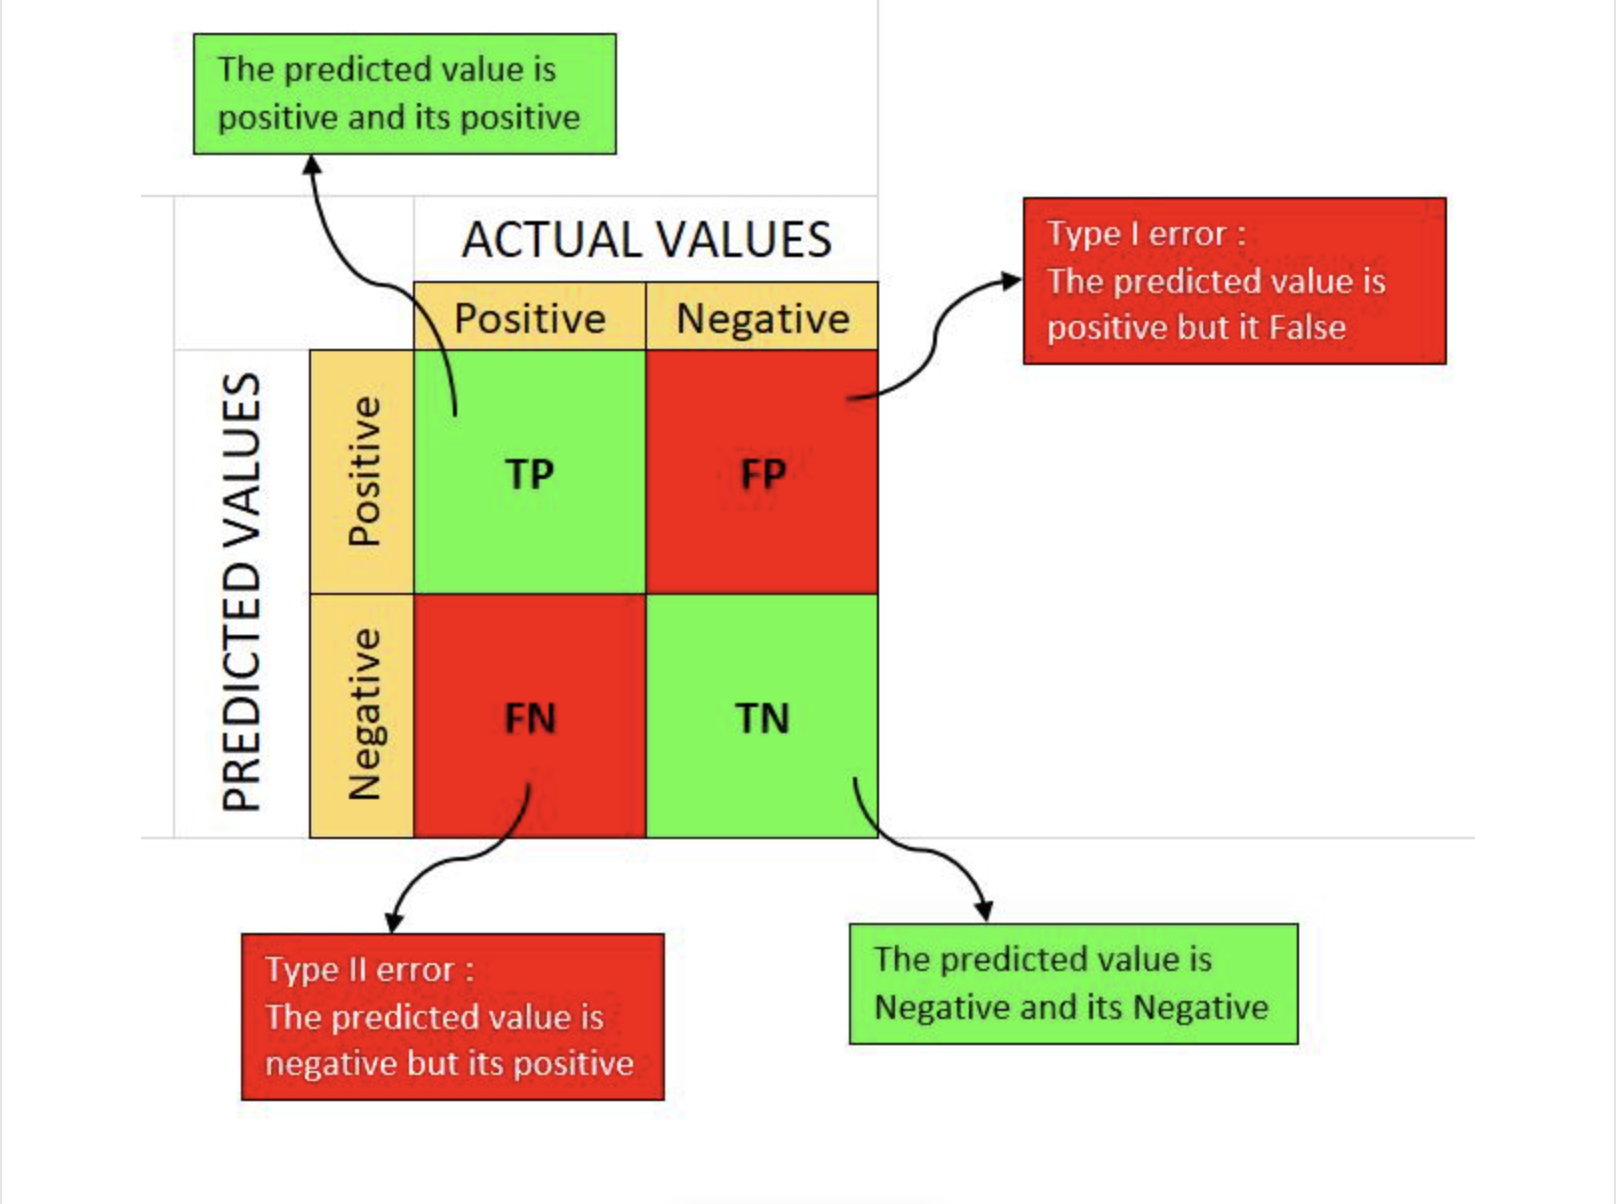
   
Several measurements of correctness are defined: accuracy, precision, recall and f1_score
</font>

### accuracy 准确率

In [57]:
### accuracy is defined as the fraction of correct predictions
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

### precision 查准率
Precision measures how accurate the positive predictions were:

In [59]:
def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

### recall 召回率
measures what fraction of the positives the model identified:

In [61]:
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

### f1_score

it is defined by combining precision and recall 

In [63]:
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r) #2/(1/p+1/r)

Precision体现了模型对负样本的区分能力，Precision越高，模型对负样本的区分能力越强；Recall体现了模型对正样本的识别能力，Recall越高，模型对正样本的识别能力越强。F1 score是两者的综合，F1 score越高，说明模型越稳健。

<table style='font-size:20px; line-height:26px;border:solid 1px grey; text-align:center;'>
    <tr><td></td><td>tested positive</td><td>tested negative</td><td>total</td></tr>
    <tr><td>COVID</td><td>580</td><td>308</td><td>888</td></tr>
    <tr><td>Healthy</td><td>21</td><td>105</td><td>126</td></tr>
    <tr><td>Total</td><td>601</td><td>413</td><td>1014</td></tr>
   </table>

Data source: Correlation of Chest CT and RT-PCR Testing in Coronavirus Disease 2019 (COVID-19) in China: A Report of 1014 Cases  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7233399/

In [65]:
print('accuracy',  accuracy(580,21,308,105))
print('precision', precision(580,21,308,105))
print('recall',    recall(580,21,308,105))
print('f1_score',  f1_score(580,21,308,105))

accuracy 0.6755424063116371
precision 0.9650582362728786
recall 0.6531531531531531
f1_score 0.7790463398253862


### ROC and AUC

In [ ]:
df_raw = pd.read_pickle('../data/malawi_clear.zip')
df_raw = df_raw.dropna()
#print(df_raw.head())
df=df_raw.iloc[1:3000,:]

selected_columns = ["wta_pop","hld_rooms"]#,,"hld_nbcellpho"
                    #"hld_selfscale",'hid__101010160033','hid__101010160060',"hid__101010160068"]
y = df.poor
x=df[selected_columns]
x_mean,x_std = x.mean(),x.std() 
x=(x-x.mean())/x.std() 

model = sm.Logit(y, x)
model = model.fit()

In [ ]:
df_test = df_raw.iloc[3001:4000,]
x_test = df_test[selected_columns]
x_test = (x_test-x_mean)/x_std
y_prob = model.predict(x_test)
y_prob

In [ ]:
y_test = df_test.poor
y_test_hat = (y_prob > 0.5)*1.0
y_test_hat

In [ ]:
y_test

In [ ]:
y_prob

In [67]:
## get tp and fp
def tp_and_fp(y,y_prob,threshold=0.5):
    y_hat = (y_prob > threshold)*1.0
    tpr = (y*y_hat).sum()/y.sum()
    fpr = ((1-y)*y_hat).sum()/(1-y).sum()
    return fpr,tpr

In [ ]:
print(tp_and_fp(y_test,y_prob,0.1))
print(tp_and_fp(y_test,y_prob,0.5))
print(tp_and_fp(y_test,y_prob,0.8))
print(tp_and_fp(y_test,y_test,0.8))

In [ ]:
fp_list = []
tp_list = []
K = 101
for p_td in np.linspace(0,1,K):
    fp,tp = tp_and_fp(y_test,y_prob,p_td)
    fp_list.append(fp)
    tp_list.append(tp)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
ax.plot(fp_list, tp_list)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title("receiver operating characteristic curve (ROC curve)")

In [ ]:
fp_array = np.array(fp_list)
delta = -(fp_array[1:K]-fp_array[0:(K-1)])
AUC = (np.array(tp_list)[1:K]*delta).sum()
print("AUC=",AUC)

In [69]:
def evaluation(y_test,y_prob,K = 100):
    fp_list = []
    tp_list = []
    K = 101
    for p_td in  np.linspace(0,1,K):
        fp,tp = tp_and_fp(y_test,y_prob,p_td)
        fp_list.append(fp)
        tp_list.append(tp)
    fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True)
    ax.plot(fp_list, tp_list)
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title("receiver operating characteristic curve (ROC curve)")
    fp_array = np.array(fp_list)
    delta = -(fp_array[1:K]-fp_array[0:(K-1)])
    AUC = (np.array(tp_list)[1:K]*delta).sum()
    return AUC

AUC: 0.5007


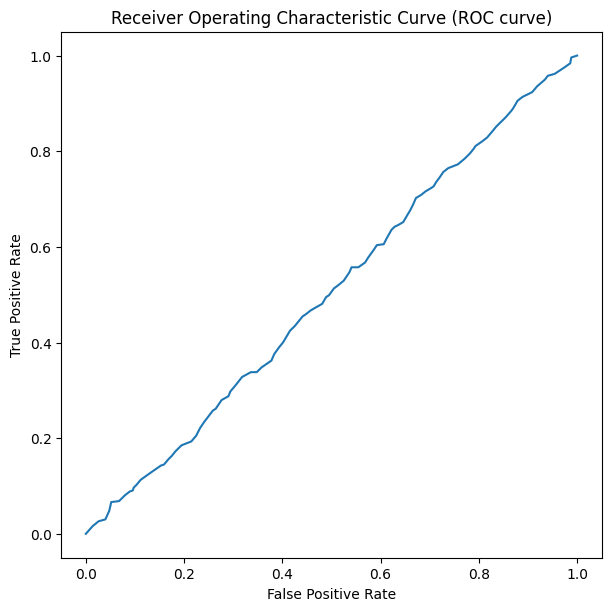

In [71]:
#auc = evaluation(y_test,y_prob,K = 101)
#print(auc)
import numpy as np
import matplotlib.pyplot as plt

# 定义辅助函数：计算假阳性率 (FPR) 和 真阳性率 (TPR)
def tp_and_fp(y_test, y_prob, p_td):
    # 将预测概率转换为二分类结果
    y_pred = (y_prob >= p_td).astype(int)
    # 真正类（实际为 1）
    TP = np.sum((y_pred == 1) & (y_test == 1))  # True Positives
    FN = np.sum((y_pred == 0) & (y_test == 1))  # False Negatives
    # 假正类（实际为 0）
    FP = np.sum((y_pred == 1) & (y_test == 0))  # False Positives
    TN = np.sum((y_pred == 0) & (y_test == 0))  # True Negatives
    
    # 计算 TPR（True Positive Rate）和 FPR（False Positive Rate）
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Sensitivity
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # Fall-out
    
    return FPR, TPR

# 定义 evaluation 函数：绘制 ROC 曲线并计算 AUC
def evaluation(y_test, y_prob, K=100):
    fp_list = []
    tp_list = []
    K = 101
    for p_td in np.linspace(0, 1, K):
        fp, tp = tp_and_fp(y_test, y_prob, p_td)
        fp_list.append(fp)
        tp_list.append(tp)
    fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
    ax.plot(fp_list, tp_list)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title("Receiver Operating Characteristic Curve (ROC curve)")
    fp_array = np.array(fp_list)
    delta = -(fp_array[1:K] - fp_array[0:(K - 1)])
    AUC = (np.array(tp_list)[1:K] * delta).sum()
    return AUC

# 生成模拟数据
np.random.seed(42)
n_samples = 1000
y_test = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # 真实标签（0 或 1）
y_prob = np.random.rand(n_samples)  # 随机预测概率（0 到 1）

# 运行 evaluation 函数
auc = evaluation(y_test, y_prob)
print(f"AUC: {auc:.4f}")

# Model (Feature) selection 
Can we do even better using a Logistic Regression Classifier?

1. forward selection, backward elimiation, stepwise.
2. ridige, lasso regularization.

<font style='font-size:20px; line-height:26px;'>


<h3>From Logistic function  to Softmax function</h3>

<h4>Sigmoid function</h4>
Logistic function (or Sigmoid function) transforms any value in R into (0,1). $s:R→(0,1)$

$$ S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1} =1-S(-z)$$

Sigmoid function follows the Bernoulli distribution.

<h4>Softmax transformation</h4>

Since the value of $Z_i$ can still be any value in $R$, additional transformation is need to convert them to 'probability' like. This is the function of <b>softmax</b>:

$$
S(z_{ij}) = \frac {e^{z_{ij}}}{\sum _{l=1}^k e^{z_{il}}}
$$

Softmax function will do 2 things:
1. convert all scores to probabilities. 
2. sum of all probabilities is 1. 

Softmax function follows the multinomial distribution with one observation (which is a multiclass version of the Bernoulli).

<h4>Bridging sigmoid and softmax</h4>

Dividing both the numerator and denominator with $ e^{Z_{ij}} $, we have 

$$ S(z_{ij}) = \frac {1}{\sum _{l=1}^k e^{z_{il}-z_{ij}}} $$

when k=2, this is 

$$ S(z_1)=\frac{1}{1+e^{-(z_1-z_2)}} \quad and \quad S(z_2)=\frac{1}{1+e^{-(z_2-z_1)}}$$

thus, we can treat the condition 'sum of probabilities equal to 1" as an adjustment to the $Z_i$ by deducting all other $z$.

</font>

In [ ]:
### testing the euqivelence of sigmoid and softmax

def logistic(x):
    return 1.0 / (1 + math.exp(-x))
sigmoid=logistic

z1, z2=1.4, 0.9
print(sigmoid(z1))
print(sigmoid(z2))

def softmax(zs):
    return np.exp(zs)/np.exp(zs).sum()
print(softmax([z1,z2]))

print(sigmoid(z1-z2))
print(sigmoid(z2-z1))

### multi-class classification

<font style='font-size:20px; line-height:26px;'>

<h3> Going beyond binary classification</h3>
    
Now consider a scenario where we need to classify an observation out of more than two classes. For example, digit classification where the possible labels are: 

$$ Y \in \{0,1,2,3,4,5,6,7,8,9\} $$

or in face recognition, where the labels are the ID of all indiviuals:

$$ Y \in \{I_1,I_2,I_3,I_4,...,I_{n-1},I_n\} $$

In general, we should consider the dataset having ‘m’ features and ‘n’ observations, and ‘k’ class labels.

A lot can be borrowed from Logistic regression for the classification of arbitrary k classes. Its approach is also the base for nueral network analysis. 

When moving to k classes classification problem, the vocabulary are somehow changed, you will see  
    
    - label    for LHS, dependent variable,
    - features for RHS variable, regressor, explanary variable, independent variables
    - weight   for $\beta$, parameters
    - bias     for intercept, constant
    
Denote $X$ as a feature matrix of $n \times m$, and $W$ as a weight matrix of $m \times k$, define

$$Z=XW+b$$

it will map the $n$ data point (image) to $R^k$, here the $b$ is a bias vector silimar to the intercept in linear regression. $Z$ have very straightforward explanation: $Z_{ij}$ is the likelihood of outcome $j$ on $i^{th}$ data point. For example, in digit image recognition, if $Z_7$ takes value 

$$
Z_7=[1.1, 2.0, 3.1, 5.2, 1.0, 1.5, 0.2, 0.1, 1.2, 0.4]
$$

The largest value 5.2 in the $4^{th}$ position signals that the number '3' is the most likely prediction. (0 is the first one). This is called softmax transformation.





In a multi-class classification problem, the labels have $m$ different values, the feature matrix has $n$ feature rows, each contains $k$ features, the weights (or parameters) to be estimated  $w$ is an $k\times m$ matrix. The estimated probability of $y_{ij}$ conditioned on the given $f_i$ feature row can be noted as $ \textrm{Prob}(\textrm{class} j| f_i)$, With the help of softmax function, we define 
    
$$ \textrm{Prob(class for }i^{th} \textrm{row}=j| f_i) \equiv \hat{y}_{ij} \equiv S(f_iw_j) $$

When $n$=7, $k$=4, $m$=3, the system to be estimated is like
</font>

$$ \left[\begin{array}{rcl}2\\1\\2\\1\\3\\1\\2\end{array} \right]\Leftrightarrow\left[\begin{array}{rcl}0&1&0\\1&0&0\\0&1&0\\1&0&0\\0&0&1\\1&0&0\\0&1&0\end{array}  \right]\Leftrightarrow
\left[ \begin{array}{rcl}
y_{11}&y_{12}&y_{13}\\
y_{21}&y_{22}&y_{23}\\
y_{31}&y_{32}&y_{33}\\
y_{41}&y_{42}&y_{43}\\
y_{51}&y_{52}&y_{53}\\
y_{61}&y_{62}&y_{63}\\
y_{71}&y_{72}&y_{73}
\end{array}\right]
= \huge s(\normalsize\left[ \begin{array}{rcl}
f_{11}&f_{12}&f_{13}&f_{14}\\
f_{21}&f_{22}&f_{23}&f_{24}\\
f_{31}&f_{32}&f_{33}&f_{34}\\
f_{41}&f_{42}&f_{43}&f_{44}\\
f_{51}&f_{52}&f_{53}&f_{54}\\
f_{61}&f_{62}&f_{63}&f_{64}\\
f_{71}&f_{72}&f_{73}&f_{74}
\end{array} \right]
\left[ \begin{array}{rcl}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
w_{31}&w_{32}&w_{33}\\
w_{41}&w_{42}&w_{43}\\
\end{array} \right]\huge)\normalsize =
\left[ \begin{array}{rcl}
\hat{y}_{11}&\hat{y}_{12}&\hat{y}_{13}\\
\hat{y}_{21}&\hat{y}_{22}&\hat{y}_{23}\\
\hat{y}_{31}&\hat{y}_{32}&\hat{y}_{33}\\
\hat{y}_{41}&\hat{y}_{42}&\hat{y}_{43}\\
\hat{y}_{51}&\hat{y}_{52}&\hat{y}_{53}\\
\hat{y}_{61}&\hat{y}_{62}&\hat{y}_{63}\\
\hat{y}_{71}&\hat{y}_{72}&\hat{y}_{73}
\end{array}\right]$$

<br>
<font style='font-size:20px; line-height:26px;'>
    
- feature set is a matrix of $n$ rows by $k$ columns
- $f_{ik}$ is the value of the $k^{th}$ input feature for the $i^{th}$ row in the training set
- weight matrix (paramers to be estimated) is a matrix of $k$ rows by $m$ columns
- $w_{km}$is the weight (parameter) that connects the $k^{th}$ input feature to the $m^{th}$ class label
- $ \hat {y}_{ij}$ is the probability of the $j^{th}$ class estimated in response to the $i^{th}$ row in training set

</font>


### Loss function
<br>
<font style='font-size:20px; line-height:26px;'>

If we assume the rows in training set are independent, then the overall probability is the products of all probabilities

$$ \prod _{i=1}^n \textrm{Prob(class for }i^{th} \textrm{row}=j |f_i)$$

thus, to maximize the probability of the training data by just picking the softmax output
corresponding to the correct class $j(i)$, for each feature row, and then multiplying them all together:

$$ \prod _{i=1}^n \hat{y}_{i,j(i)}$$

we can take the logarithm to make it easier to process
$$ \sum _{i=1}^n \textrm{ln} \hat{y}_{i,j(i)}$$
In practics, we always try to minimize the negative log probability on the train set, and here comes the loss function
$$ L= \sum _{i=1}^n -\textrm{ln} \hat{y}_{i,j(i)}$$

the loss function as defined above is called the cross-entropy loss.
</font>